In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)
x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds

## Faster Optimizers

In [3]:
# Momentum optimizaiton
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# AdaGrad
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

# RMSProp
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# Adam optimization
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Adamax optimization
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Nadam optimization
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

Power Scheduling

In [4]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['acc'])

In [5]:
n_epochs=25

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4882 - acc: 0.8278 - val_loss: 0.4111 - val_acc: 0.8558
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3822 - acc: 0.8645 - val_loss: 0.3728 - val_acc: 0.8694
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3490 - acc: 0.8762 - val_loss: 0.3624 - val_acc: 0.8730
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3273 - acc: 0.8834 - val_loss: 0.3522 - val_acc: 0.8780
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3111 - acc: 0.8894 - val_loss: 0.3436 - val_acc: 0.8788
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2988 - acc: 0.8941 - val_loss: 0.3408 - val_acc: 0.8776
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2887 - acc: 0.8969 - val_loss: 0.3373 - val_acc: 0.8826
Epoch 8/25
1719/1719 [==============================] - 2s 1ms

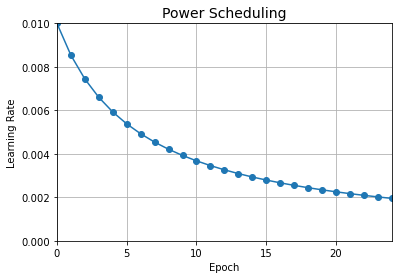

In [6]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(x_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, 'o-')
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Power Scheduling', fontsize=14)
plt.grid(True)
plt.show()

Exponential Scheduling

In [7]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [8]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.01 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='nadam', 
              metrics=['acc'])

n_epochs=25

In [10]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(x_valid_scaled, y_valid), 
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8387 - acc: 0.7556 - val_loss: 0.8214 - val_acc: 0.7812
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5855 - acc: 0.8170 - val_loss: 0.7699 - val_acc: 0.8146
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5064 - acc: 0.8394 - val_loss: 0.5018 - val_acc: 0.8536
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4406 - acc: 0.8577 - val_loss: 0.4437 - val_acc: 0.8654
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3765 - acc: 0.8752 - val_loss: 0.4615 - val_acc: 0.8568
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3363 - acc: 0.8872 - val_loss: 0.4026 - val_acc: 0.8748
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2957 - acc: 0.8974 - val_loss: 0.4046 - val_acc: 0.8822
Epoch 8/25
1719/1719 [==============================] - 3s 2ms

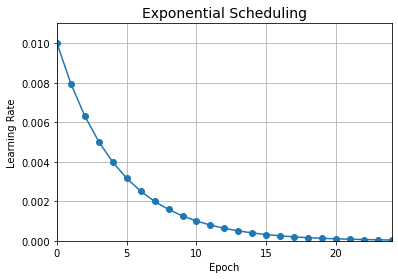

In [11]:
plt.plot(history.epoch, history.history['lr'], 'o-')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1 / 20)

In [13]:
K = keras.backend


class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s
        
    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1 ** (1 / s))
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)
        

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['acc'])
n_epochs = 25

s = 20 * len(x_train) // 32
exp_decay = ExponentialDecay(s)

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(x_valid_scaled, y_valid), 
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7882 - acc: 0.7720 - val_loss: 0.7218 - val_acc: 0.7972
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6512 - acc: 0.8030 - val_loss: 0.7537 - val_acc: 0.7802
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5519 - acc: 0.8279 - val_loss: 0.8631 - val_acc: 0.7598
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4879 - acc: 0.8460 - val_loss: 0.5320 - val_acc: 0.8164
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4702 - acc: 0.8523 - val_loss: 0.5176 - val_acc: 0.8562
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4328 - acc: 0.8654 - val_loss: 0.5715 - val_acc: 0.8478
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3899 - acc: 0.8729 - val_loss: 0.4751 - val_acc: 0.8620
Epoch 8/25
1719/1719 [==============================] - 4s 2ms

In [14]:
n_steps = n_epochs * len(x_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1 ** (steps / s)

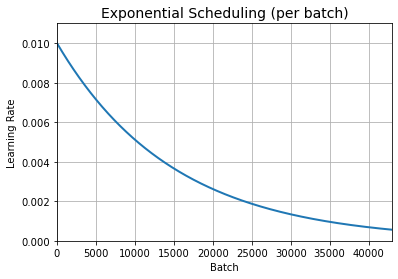

In [15]:
plt.plot(steps, lrs, '-', linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel('Batch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling (per batch)', fontsize=14)
plt.grid(True)
plt.show()

Piecewise Constant Scheduling

In [16]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [17]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [18]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='nadam', 
              metrics=['acc'])

n_epochs = 25

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(x_valid_scaled, y_valid), 
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8663 - acc: 0.7549 - val_loss: 1.2180 - val_acc: 0.7260
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8608 - acc: 0.7530 - val_loss: 1.2445 - val_acc: 0.6442
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8145 - acc: 0.7568 - val_loss: 1.3102 - val_acc: 0.6252
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8421 - acc: 0.7608 - val_loss: 0.8308 - val_acc: 0.7480
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8364 - acc: 0.7568 - val_loss: 1.0003 - val_acc: 0.6796
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5414 - acc: 0.8312 - val_loss: 0.6967 - val_acc: 0.7962
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4716 - acc: 0.8530 - val_loss: 0.5542 - val_acc: 0.8412
Epoch 8/25
1719/1719 [==============================] - 3s 2ms

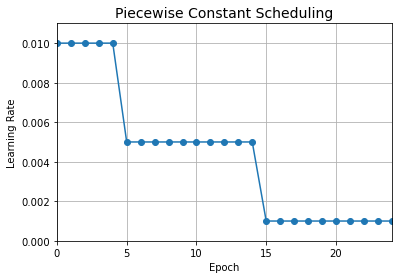

In [19]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], 'o-')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Piecewise Constant Scheduling', fontsize=14)
plt.grid(True)
plt.show()

Performance Scheduling

In [20]:
tf.random.set_seed(42)
np.random.seed(42)

In [21]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['acc'])

n_epochs = 25

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(x_valid_scaled, y_valid), 
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5935 - acc: 0.8070 - val_loss: 0.4701 - val_acc: 0.8488
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4962 - acc: 0.8396 - val_loss: 0.5691 - val_acc: 0.8334
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5228 - acc: 0.8412 - val_loss: 0.5809 - val_acc: 0.8430
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5163 - acc: 0.8468 - val_loss: 0.4740 - val_acc: 0.8576
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5251 - acc: 0.8486 - val_loss: 0.5588 - val_acc: 0.8286
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5026 - acc: 0.8541 - val_loss: 0.5672 - val_acc: 0.8468
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3045 - acc: 0.8950 - val_loss: 0.3696 - val_acc: 0.8826
Epoch 8/25
1719/1719 [==============================] - 2s 1ms

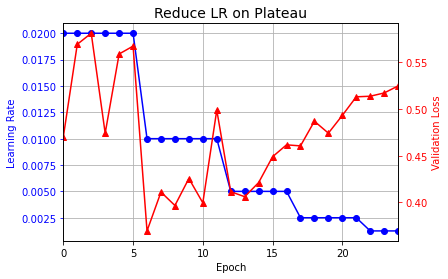

In [22]:
plt.plot(history.epoch, history.history['lr'], 'bo-')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate', color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history['val_loss'], 'r^-')
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title('Reduce LR on Plateau', fontsize=14)
plt.show()

tf.keras schedulers

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

s = 20 * len(x_train) // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['acc'])

n_epochs = 25

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(x_valid_scaled, y_valid), 
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4893 - acc: 0.8273 - val_loss: 0.4094 - val_acc: 0.8606
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3819 - acc: 0.8647 - val_loss: 0.3738 - val_acc: 0.8692
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3487 - acc: 0.8763 - val_loss: 0.3730 - val_acc: 0.8688
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3264 - acc: 0.8834 - val_loss: 0.3491 - val_acc: 0.8802
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3104 - acc: 0.8897 - val_loss: 0.3431 - val_acc: 0.8800
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2959 - acc: 0.8954 - val_loss: 0.3412 - val_acc: 0.8816
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2855 - acc: 0.8985 - val_loss: 0.3353 - val_acc: 0.8812
Epoch 8/25
1719/1719 [==============================] - 2s 1ms

One Cycle Scheduler

In [24]:
tf.random.set_seed(42)
np.random.seed(42)

In [25]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, 
                    self.model.optimizer.lr * self.factor)

In [26]:
import math

def find_learning_rate(model, x, y, epochs=1, batch_size=32, 
                       min_rate=10 ** -5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(x) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(x, y, epochs=epochs, 
                        batch_size=batch_size, 
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses


def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel('Learning rate', fontsize=14)
    plt.ylabel('Loss', fontsize=14)

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=1e-3)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['acc'])

430/430 [==============================] - 1s 2ms/step - loss: 2722270531289088.0000 - acc: 0.3867


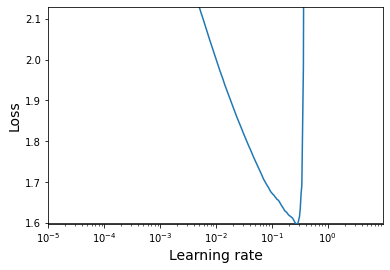

In [28]:
batch_size = 128
rates, losses = find_learning_rate(model, x_train_scaled, y_train, 
                                   epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [29]:
 class OneCycleScheduler(keras.callbacks.Callback):
        def __init__(self, iterations, max_rate, start_rate=None, 
                     last_iterations=None, last_rate=None):
            self.iterations = iterations
            self.max_rate = max_rate
            self.start_rate = start_rate or max_rate / 10
            self.last_iterations = last_iterations or iterations // 10 + 1
            self.half_iteration = (iterations - self.last_iterations) // 2
            self.last_rate = last_rate or self.start_rate / 1000
            self.iteration = 0
            
        def _interpolate(self, iter1, iter2, rate1, rate2):
            return ((rate2 - rate1) * (self.iteration - iter1) 
                    / (iter2 - iter1) + rate1)
        
        def on_batch_begin(self, batch, logs):
            if self.iteration < self.half_iteration:
                rate = self._interpolate(0, self.half_iteration, 
                                         self.start_rate, self.max_rate)
            elif self.iteration < 2 * self.half_iteration:
                rate = self._interpolate(self.half_iteration, 2 * self.half_iteration, 
                                         self.max_rate, self.start_rate)
            else:
                rate = self._interpolate(2 * self.half_iteration, self.iterations, 
                                         self.start_rate, self.last_rate)
            self.iteration += 1
            K.set_value(self.model.optimizer.lr, rate)

In [30]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(x_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size, 
                    validation_data=(x_valid_scaled, y_valid), callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 2ms/step - loss: 0.6572 - acc: 0.7740 - val_loss: 0.4872 - val_acc: 0.8336
Epoch 2/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4581 - acc: 0.8395 - val_loss: 0.4275 - val_acc: 0.8522
Epoch 3/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4122 - acc: 0.8547 - val_loss: 0.4115 - val_acc: 0.8582
Epoch 4/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3837 - acc: 0.8641 - val_loss: 0.3868 - val_acc: 0.8682
Epoch 5/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3639 - acc: 0.8718 - val_loss: 0.3766 - val_acc: 0.8688
Epoch 6/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3457 - acc: 0.8771 - val_loss: 0.3742 - val_acc: 0.8710
Epoch 7/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3330 - acc: 0.8809 - val_loss: 0.3636 - val_acc: 0.8714
Epoch 8/25
430/430 [==============================] - 1s 2ms/step - loss: 0.